In [1]:
from combine_data import CombineData
import matplotlib.pyplot as plt
import seaborn as sns
from create_data_for_r_pipelined import RDataCreationPipeline
from combine_multiple_pollutants import CombineMultiplePollutants
import numpy as np

In [2]:
pollutants = ["PM2", "PM10", "O3"]
state_code = "06"
county_code =["111", "037"]

In [3]:
box_plot_data = {}
for p in pollutants:
    df = CombineData(p, start_date="22-01-2020", end_date="30-04-2020").get_pandas_obj()
    df = df[df['State Code']==state_code]
    df = df[df['County Code'].isin(county_code)]
    box_plot_data[p] = df['First Max Value'].tolist()
    print(df['Units Of Measure'].iloc[1])

Data fetched for year:  2020
Micrograms/cubic meter (LC)
Data fetched for year:  2020
Micrograms/cubic meter (25 C)
Data fetched for year:  2020
Parts per million


In [4]:
df['Units Of Measure'].iloc[1]

'Parts per million'

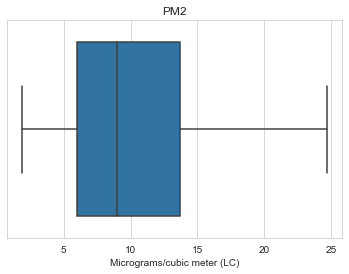

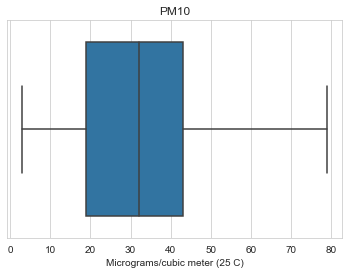

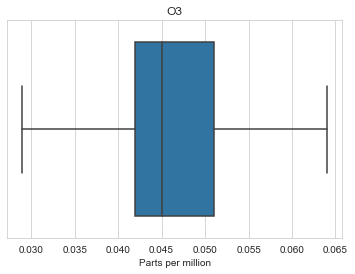

In [5]:
units = ['Micrograms/cubic meter (LC)','Micrograms/cubic meter (25 C)', 'Parts per million' ]
sns.set_style('whitegrid')
for index, p in enumerate(pollutants):
    sns.boxplot(box_plot_data[p], sym='')
    plt.title(p)
    plt.xlabel(units[index])
    #plt.savefig('manuscript_images/desc_stat_{}.png'.format(p), dpi=600)
    plt.show()

In [6]:
mat_df = RDataCreationPipeline("PM2", "0-7").mat_df
mat_df = mat_df[(mat_df['date'] >= "22-01-2020") & (mat_df['date'] <= "30-04-2020")]
mat_df

WIND Knots
TEMP Degrees Fahrenheit
RH Percent relative humidity
Pressue Millibars
Common cities in 06 state: {'Ventura', 'San Bernardino', 'Inyo', 'Los Angeles', 'San Diego'}


D:\CovidPollution\create_data_for_r_pipelined.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date_number'] = list(range(1, tdf.shape[0] + 1))


r_files/source_file_SA4/R_data_PM2_06_0-7_COVID_mortality.csv & r_files/source_file_SA4/R_data_PM2_06_0-7_COVID_cases.csv written for PM2 at lag 0-7.


,date,county,mean_pressure,mean_rh,mean_temp,mean_wind,city,date_number
42,2020-01-22,Los Angeles,933.333333,58.625000,53.754167,4.175000,1,22
43,2020-01-22,Ventura,987.583333,81.083333,54.625000,4.675000,2,22
44,2020-01-23,Los Angeles,933.750000,63.125000,49.966667,1.858333,1,23
45,2020-01-23,Ventura,985.708333,66.909091,64.375000,7.483333,2,23
46,2020-01-24,Los Angeles,930.166667,55.208333,52.495833,3.029167,1,24
...,...,...,...,...,...,...,...,...
207,2020-04-26,Ventura,980.666667,71.250000,72.708333,5.337500,2,117
208,2020-04-27,Ventura,981.416667,71.416667,70.125000,5.712500,2,118
209,2020-04-28,Ventura,981.708333,75.458333,71.450000,6.004167,2,119
210,2020-04-29,Ventura,981.875000,85.791667,68.684211,6.012500,2,120


In [7]:
pollutants = ["PM2", "PM10", "O3"]
df = CombineMultiplePollutants(pollutants,  year=2020, state_code="06", filter_city_list=["037", "111"]).combine_pollutants()

PM2 Micrograms/cubic meter (LC)
PM10 Micrograms/cubic meter (25 C)
O3 Parts per million


In [8]:
df = df.merge(mat_df, on=('date', 'county'))
df.drop(['date_number', 'city', 'date'], axis=1, inplace=True)

In [9]:
des_stats =  df.describe()
des_stats.columns = ['PM 2.5', 'PM 10', 'O3', 'Pressure', 'RH', 'Temperature','Wind']
des_stats = des_stats.round(2)
des_stats.to_csv("manuscript_images/table_1_MR.csv")

In [10]:
df.drop(['county'], inplace=True, axis=1)
df.columns = ['PM 2.5', 'PM 10', 'O3', 'Pressure', 'RH', 'Temperature','Wind']

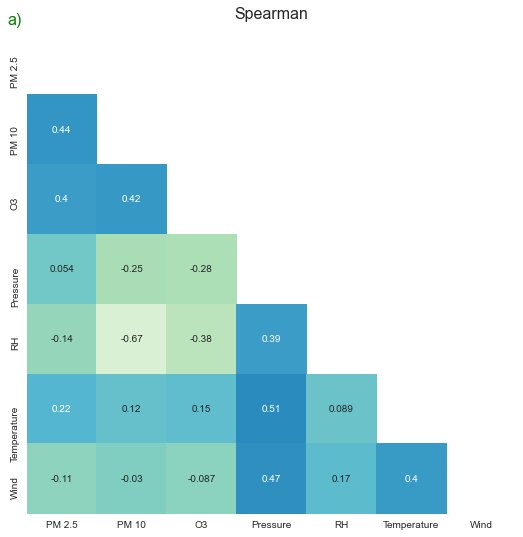

In [34]:
plt.close()
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = plt.get_cmap("GnBu")
sns.heatmap(corr, annot=True, cmap=cmap, mask=mask,  cbar_kws={"shrink": .5}, vmax=1, vmin=-1, cbar=False, square=True)
ax.text(-0.04, 1, 'a)', transform=ax.transAxes, size=16, color='green')
plt.title('Spearman', size=16)
plt.savefig("manuscript_images/des_analysis_corr_MR_spear.png", dpi=600, bbox_inches='tight')
plt.show()

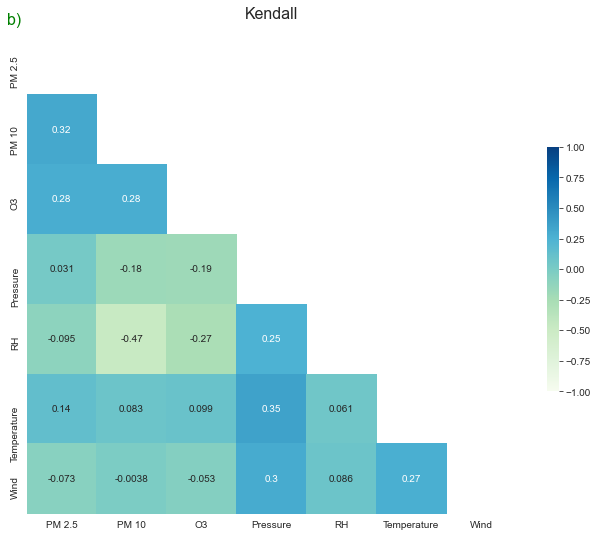

In [35]:
plt.close()
corr = df.corr(method='kendall')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = plt.get_cmap("GnBu")
sns.heatmap(corr, annot=True, cmap=cmap, mask=mask,  cbar_kws={"shrink": .5}, vmax=1, vmin=-1, square=True)
ax.text(-0.04, 1, 'b)', transform=ax.transAxes, size=16, color='green')
plt.title('Kendall', size=16)
plt.savefig("manuscript_images/des_analysis_corr_MR_kendall.png", dpi=600, bbox_inches='tight')
plt.show()

In [11]:
df.corr?